In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/vc/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import pandas as pd
pd.set_option('html', False)
import h5py
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

%matplotlib inline

In [13]:
cont_mar = [[pd.to_datetime('2015-03-03 16:00:00'), pd.to_datetime('2015-03-04 00:00:00')]]
cont_apr = [[pd.to_datetime('2015-04-08 16:00:00'), pd.to_datetime('2015-04-10 18:00:00')]]

cont_may = [[pd.to_datetime('2015-05-05 16:00:00'), pd.to_datetime('2015-05-06 18:00:00')], [pd.to_datetime('2015-05-09 16:00:00'), pd.to_datetime('2015-05-10 18:00:00')]]

cont_jun = [[pd.to_datetime('2015-06-10 16:00:00'), pd.to_datetime('2015-06-13 15:00:00')]]
cont_oct = [[pd.to_datetime('2015-10-04 15:00:00'), pd.to_datetime('2015-10-05 18:00:00')]]
cont_dic = [[pd.to_datetime('2015-12-25 00:00:00'), pd.to_datetime('2015-12-26 00:00:00')]]

In [3]:
path2datosVC = "../datos/dataframes_VC_contaminantes/cca/"

In [4]:
mar_dat = pd.read_csv(path2datosVC + 'mar_vc_contaminantes_cca.csv', index_col=0)
mar_dat.index = pd.to_datetime(mar_dat.index)

In [5]:
apr_dat = pd.read_csv(path2datosVC + 'apr_vc_contaminantes_cca.csv', index_col=0)
apr_dat.index = pd.to_datetime(apr_dat.index)

In [6]:
may_dat = pd.read_csv(path2datosVC + 'may_vc_contaminantes_cca.csv', index_col=0)
may_dat.index = pd.to_datetime(may_dat.index)

In [7]:
dic_dat = pd.read_csv(path2datosVC + 'dic_vc_contaminantes_cca.csv', index_col=0)
dic_dat.index = pd.to_datetime(dic_dat.index)

In [22]:
jun_dat = pd.read_csv(path2datosVC + 'jun_vc_contaminantes_cca.csv', index_col=0)
jun_dat.index = pd.to_datetime(jun_dat.index)

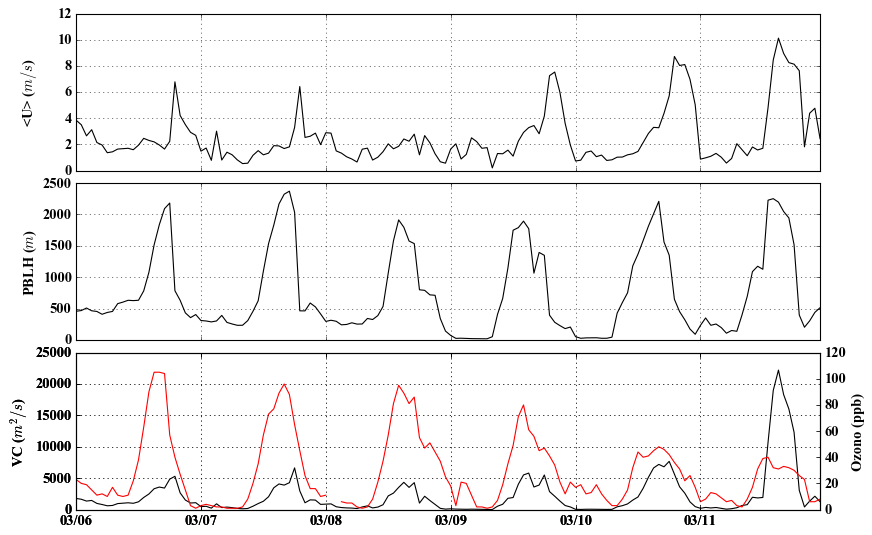

In [39]:
month_dat = mar_dat

inicio = "2015-03-06"
fin = "2015-03-11 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
#for contin in cont_mar:
#    ax3.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
#for contin in cont_mar:
#    ax2.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['o3'][inicio:fin], color = 'r')
#for contin in cont_mar:
#    ax1.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

In [1]:
month_dat = mar_dat

inicio = "2015-03-06"
fin = "2015-03-11 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[1], sharex=ax1)
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
#for contin in cont_mar:
#    ax3.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[0], sharex=ax1)
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
#for contin in cont_mar:
#    ax2.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2])
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['o3'][inicio:fin], color = 'r')
#for contin in cont_mar:
#    ax1.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)

NameError: name 'mar_dat' is not defined

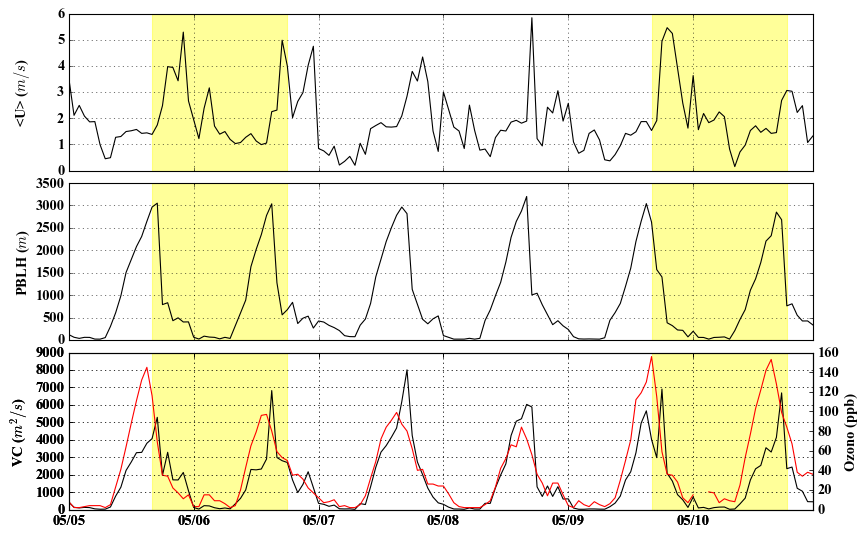

In [17]:
month_dat = may_dat

inicio = "2015-05-05"
fin = "2015-05-10 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
for contin in cont_may:
    ax3.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
for contin in cont_may:
    ax2.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['o3'][inicio:fin], color = 'r')
for contin in cont_may:
    ax1.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

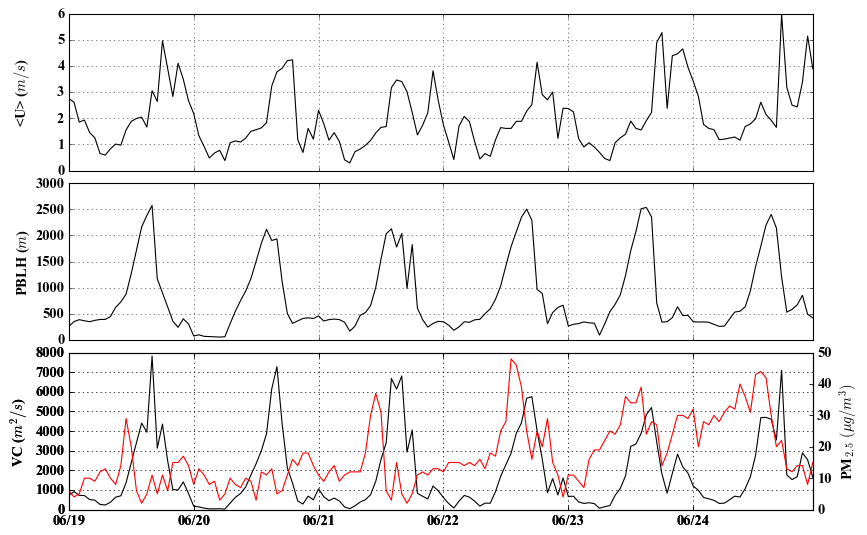

In [37]:
month_dat = jun_dat

inicio = "2015-06-19 00:00:00"
fin = "2015-06-24 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['pm25'][inicio:fin], color = 'r')
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("PM$_{2.5}$ $(\mu g/m^3)$")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
par1.tick_params(labelbottom=False)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

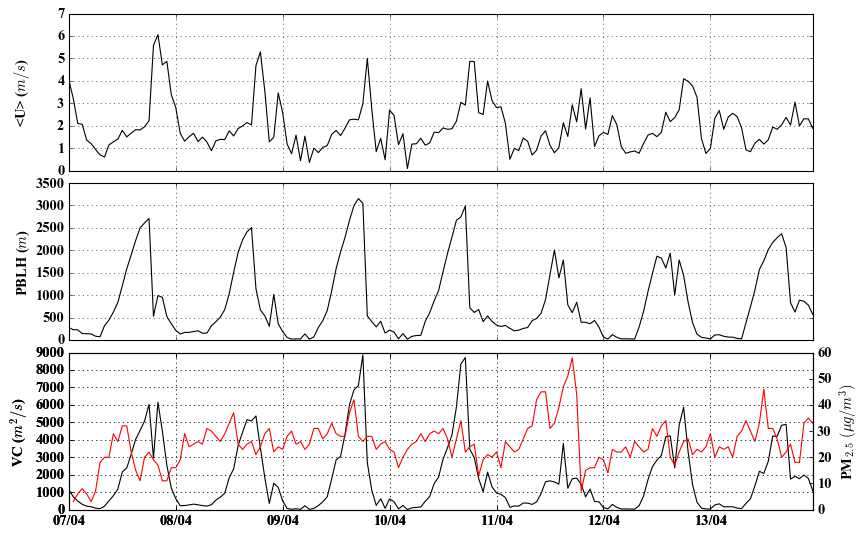

In [35]:
month_dat = apr_dat

inicio = "2015-04-07 00:00:00"
fin = "2015-04-13 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['pm25'][inicio:fin], color = 'r')
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("PM$_{2.5}$ $(\mu g/m^3)$")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(myFmt)

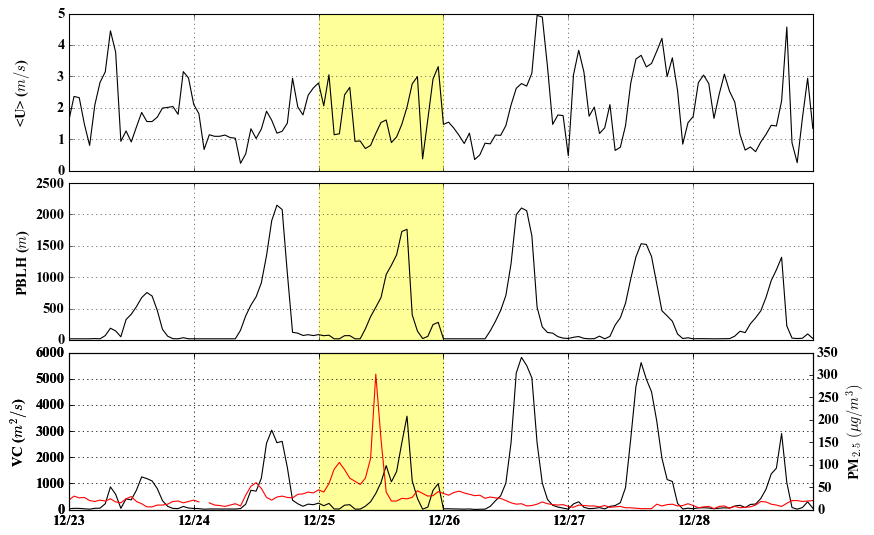

In [21]:
month_dat = dic_dat

inicio = "2015-12-23 00:00:00"
fin = "2015-12-28 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')
for contin in cont_dic:
    ax3.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')
for contin in cont_dic:
    ax2.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['pm25'][inicio:fin], color = 'r')
for contin in cont_dic:
    ax1.axvspan(contin[1], contin[0], color='yellow', alpha=0.4)
ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("PM$_{2.5}$ $(\mu g/m^3)$")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)

#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

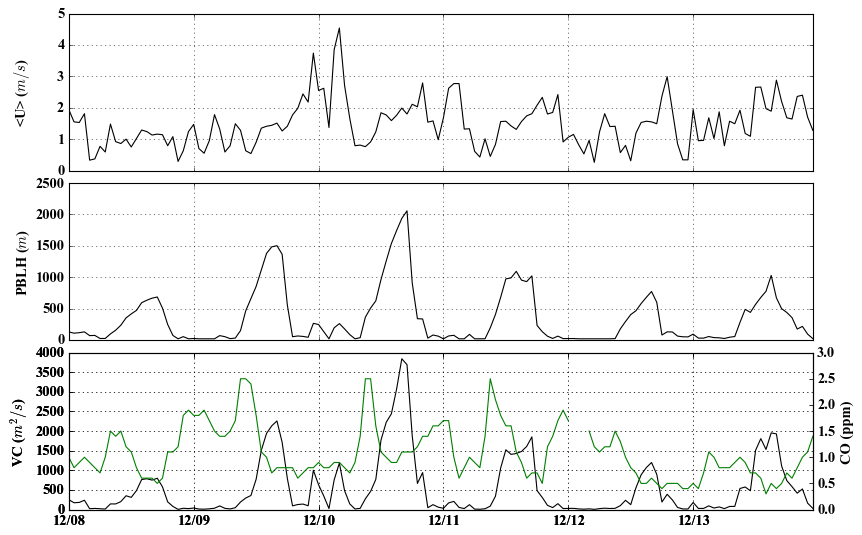

In [28]:
month_dat = dic_dat

inicio = "2015-12-8 00:00:00"
fin = "2015-12-13 23:00:00"

plt.rcParams.update({'font.size': 13})
    
plt.figure(figsize=[12,8])
gs1 = gridspec.GridSpec(3,1)
gs1.update(hspace=0.08)


ax3 = plt.subplot(gs1[0])
ax3.plot(month_dat['u_mean_24'][inicio:fin], color = 'k')

#ax3.axvline(cero, ymin=0, ymax=11)
#ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
ax3.tick_params(labelbottom=False)
ax3.get_yaxis().set_label_coords(-0.05,0.5)
ax3.grid(which='both')
ax3.set_ylabel('<U> ($m/s$)')


ax2 = plt.subplot(gs1[1])
ax2.plot(month_dat['pblh_24'][inicio:fin], color = 'k')

ax2.grid(which='both')
ax2.tick_params(labelbottom=False)
ax2.set_ylabel('PBLH ($m$)')
#plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.set_xlim(inicio, fin)
#ax2.set_ylim(0, 3000 + 100)
ax2.get_yaxis().set_label_coords(-0.05,0.5)
#ax2.axvline(cero, ymin=0, ymax=4500)
#ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
#plt.subplots_adjust()
par1 = ax1.twinx()
ax1.plot(month_dat['VC_24'][inicio:fin], color = 'k')
par1.plot(month_dat['co'][inicio:fin], color = 'g')

ax1.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("CO (ppm)")
ax1.grid()
ax1.get_yaxis().set_label_coords(-0.08,0.5)
#plt.setp(ax1.get_xticklabels(), visible=False)
##par1.spines['bottom'].set_visible(False)
par1.set_ylim(0,3.0)
#par1.tick_params(bottom=False)
#plt.gca().xaxis.set_major_formatter(visible=False)
#plt.setp(par1.get_xticklabels(), )
myFmt = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(myFmt)

# Contaminantes

### O3 mayo

In [71]:
k = 1

month_dat = may_dat

inicio = "2015-05-05 00:00:00"
fin = "2015-05-10 23:00:00"
dias = pd.date_range(inicio, fin, freq='1H')

f_aux = dias[-1] + pd.to_timedelta(23, unit='h')

vc_max = month_dat['VC_24'][inicio:f_aux].max()
pblh_max = month_dat['pblh_24'][inicio:f_aux].max()
u_max = month_dat['u_mean_24'][inicio:f_aux].max()
o3_max = month_dat['o3'][inicio:f_aux].max()
print('VC_max', vc_max)
print('PBLH_max', pblh_max)
print('U_max', u_max)
for i in dias:
    print('Gráfica: ', i)
    
    f = i+pd.to_timedelta(23, unit='h')
    #print('ff', f.hour)
    
    #print('cero', cero)
    date_i = i
    date_f = f
    cero = date_f - pd.to_timedelta(date_f.hour, unit='h')
    middle = date_f - pd.to_timedelta(12, unit='h')
    
    #plt.clf()
    
    fig = plt.figure(figsize = (7,8))
    gs1 = gridspec.GridSpec(3,1)
    gs1.update(hspace=0.05) # set the spacing between axes. 
    fig.suptitle(date_i.date(), y = 0.92, x = 0.17, color = 'blue')

    ax2 = plt.subplot(gs1[0])
    ax2.plot(month_dat['pblh_24'][date_i:date_f], color = 'k')
    ax2.grid(which='both')
    ax2.tick_params(labelbottom=False)
    ax2.set_ylabel('PBLH ($m$)')
    ax2.set_xlim(date_i, date_f)
    ax2.set_ylim(0, pblh_max + 100)
    ax2.get_yaxis().set_label_coords(-0.08,0.5)
    ax2.axvline(cero, ymin=0, ymax=4500)
    ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

    ax3 = plt.subplot(gs1[1])
    ax3.plot(month_dat['u_mean_24'][date_i:date_f], color = 'k')
    ax3.axvline(cero, ymin=0, ymax=11)
    ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
    ax3.grid(which='both')
    ax3.tick_params(labelbottom=False)
    ax3.set_ylabel('<U> ($m/s$)')
    ax3.set_xlim(date_i, date_f)
    ax3.set_ylim(0, u_max + 1)
    ax3.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
    par1 = ax1.twinx()
    ax1.plot(month_dat['VC_24'][date_i:date_f], color = 'k')
    par1.plot(month_dat['o3'][date_i:date_f], color = 'r')
    #ax1.scatter(month_dat['VC_24'][date_i:date_f].index.values, month_dat['VC_24'][date_i:date_f].values, marker = 's', color = 'k')
    ax1.axvline(cero, ymin=0, ymax=25000)
    ax1.axvline(middle, ymin=0, ymax=25000, linestyle = 'dashed', color = 'k')
    ax1.grid(which='both')
    #ax1.tick_params(labelbottom=False)
    ax1.set_ylabel('VC ($m^2/s$)')
    par1.set_ylabel("Ozono (ppb)")
    ax1.set_xlim(date_i, date_f)
    ax1.set_ylim(0, vc_max + 300)
    par1.set_ylim(0, o3_max + 10)
    ax1.set_xticklabels([cero])
    ax1.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    #plt.show()
    
    h = '%03d'%k
    plt.savefig('/Users/claudiopierard/VC/animaciones/VC_series/may_cont_1/may_cont'+ h)
    k += 1
    plt.close(fig)

VC_max 8431
PBLH_max 3201.27
U_max 5.96
Gráfica:  2015-05-05 00:00:00
Gráfica:  2015-05-05 01:00:00
Gráfica:  2015-05-05 02:00:00
Gráfica:  2015-05-05 03:00:00
Gráfica:  2015-05-05 04:00:00
Gráfica:  2015-05-05 05:00:00
Gráfica:  2015-05-05 06:00:00
Gráfica:  2015-05-05 07:00:00
Gráfica:  2015-05-05 08:00:00
Gráfica:  2015-05-05 09:00:00
Gráfica:  2015-05-05 10:00:00
Gráfica:  2015-05-05 11:00:00
Gráfica:  2015-05-05 12:00:00
Gráfica:  2015-05-05 13:00:00
Gráfica:  2015-05-05 14:00:00
Gráfica:  2015-05-05 15:00:00
Gráfica:  2015-05-05 16:00:00
Gráfica:  2015-05-05 17:00:00
Gráfica:  2015-05-05 18:00:00
Gráfica:  2015-05-05 19:00:00
Gráfica:  2015-05-05 20:00:00
Gráfica:  2015-05-05 21:00:00
Gráfica:  2015-05-05 22:00:00
Gráfica:  2015-05-05 23:00:00
Gráfica:  2015-05-06 00:00:00
Gráfica:  2015-05-06 01:00:00
Gráfica:  2015-05-06 02:00:00
Gráfica:  2015-05-06 03:00:00
Gráfica:  2015-05-06 04:00:00
Gráfica:  2015-05-06 05:00:00
Gráfica:  2015-05-06 06:00:00
Gráfica:  2015-05-06 07:00:00


## PM2.5 jun

In [10]:
k = 60

month_dat = dic_dat

inicio = "2015-12-26 11:00:00"
fin = "2015-12-28 23:00:00"
dias = pd.date_range(inicio, fin, freq='1H')

f_aux = dias[-1] + pd.to_timedelta(23, unit='h')

vc_max = month_dat['VC_24'][inicio:f_aux].max()
pblh_max = month_dat['pblh_24'][inicio:f_aux].max()
u_max = month_dat['u_mean_24'][inicio:f_aux].max()
pm25_max = month_dat['pm25'][inicio:f_aux].max()
print('VC_max', vc_max)
print('PBLH_max', pblh_max)
print('U_max', u_max)
for i in dias:
    print('Gráfica: ', i)
    
    f = i+pd.to_timedelta(23, unit='h')
    #print('ff', f.hour)
    
    #print('cero', cero)
    date_i = i
    date_f = f
    cero = date_f - pd.to_timedelta(date_f.hour, unit='h')
    middle = date_f - pd.to_timedelta(12, unit='h')
    
    #plt.clf()
    
    fig = plt.figure(figsize = (7,8))
    gs1 = gridspec.GridSpec(3,1)
    gs1.update(hspace=0.05) # set the spacing between axes. 
    fig.suptitle(date_i.date(), y = 0.92, x = 0.17, color = 'blue')

    ax2 = plt.subplot(gs1[0])
    ax2.plot(month_dat['pblh_24'][date_i:date_f], color = 'k')
    ax2.grid(which='both')
    ax2.tick_params(labelbottom=False)
    ax2.set_ylabel('PBLH ($m$)')
    ax2.set_xlim(date_i, date_f)
    ax2.set_ylim(0, pblh_max + 100)
    ax2.get_yaxis().set_label_coords(-0.08,0.5)
    ax2.axvline(cero, ymin=0, ymax=4500)
    ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

    ax3 = plt.subplot(gs1[1])
    ax3.plot(month_dat['u_mean_24'][date_i:date_f], color = 'k')
    ax3.axvline(cero, ymin=0, ymax=11)
    ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
    ax3.grid(which='both')
    ax3.tick_params(labelbottom=False)
    ax3.set_ylabel('<U> ($m/s$)')
    ax3.set_xlim(date_i, date_f)
    ax3.set_ylim(0, u_max + 1)
    ax3.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    ax1 = host_subplot(gs1[2], axes_class=AA.Axes)
    par1 = ax1.twinx()
    ax1.plot(month_dat['VC_24'][date_i:date_f], color = 'k')
    par1.plot(month_dat['pm25'][date_i:date_f], color = 'r')
    #ax1.scatter(month_dat['VC_24'][date_i:date_f].index.values, month_dat['VC_24'][date_i:date_f].values, marker = 's', color = 'k')
    ax1.axvline(cero, ymin=0, ymax=25000)
    ax1.axvline(middle, ymin=0, ymax=25000, linestyle = 'dashed', color = 'k')
    ax1.grid(which='both')
    #ax1.tick_params(labelbottom=False)
    ax1.set_ylabel('VC ($m^2/s$)')
    par1.set_ylabel("PM$_{2.5}$ $(\mu g/m^3)$")
    ax1.set_xlim(date_i, date_f)
    ax1.set_ylim(0, vc_max + 300)
    par1.set_ylim(0, pm25_max + 5)
    ax1.set_xticklabels([cero])
    ax1.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    #plt.show()
    
    h = '%03d'%k
    plt.savefig('/Users/claudiopierard/VC/animaciones/VC_series/dic_cont/dic_cont'+ h)
    k += 1
    plt.close(fig)

VC_max 5818
PBLH_max 2102.87
U_max 5.66
Gráfica:  2015-12-26 11:00:00
Gráfica:  2015-12-26 12:00:00
Gráfica:  2015-12-26 13:00:00
Gráfica:  2015-12-26 14:00:00
Gráfica:  2015-12-26 15:00:00
Gráfica:  2015-12-26 16:00:00
Gráfica:  2015-12-26 17:00:00
Gráfica:  2015-12-26 18:00:00
Gráfica:  2015-12-26 19:00:00
Gráfica:  2015-12-26 20:00:00
Gráfica:  2015-12-26 21:00:00
Gráfica:  2015-12-26 22:00:00
Gráfica:  2015-12-26 23:00:00
Gráfica:  2015-12-27 00:00:00
Gráfica:  2015-12-27 01:00:00
Gráfica:  2015-12-27 02:00:00
Gráfica:  2015-12-27 03:00:00
Gráfica:  2015-12-27 04:00:00
Gráfica:  2015-12-27 05:00:00
Gráfica:  2015-12-27 06:00:00
Gráfica:  2015-12-27 07:00:00
Gráfica:  2015-12-27 08:00:00
Gráfica:  2015-12-27 09:00:00
Gráfica:  2015-12-27 10:00:00
Gráfica:  2015-12-27 11:00:00
Gráfica:  2015-12-27 12:00:00
Gráfica:  2015-12-27 13:00:00
Gráfica:  2015-12-27 14:00:00
Gráfica:  2015-12-27 15:00:00
Gráfica:  2015-12-27 16:00:00
Gráfica:  2015-12-27 17:00:00
Gráfica:  2015-12-27 18:00:00


OSError: [Errno 24] Too many open files: '/Library/Fonts/Times New Roman Bold.ttf'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1088489d8> (for post_execute):


OSError: [Errno 24] Too many open files: '/Library/Fonts/Times New Roman Bold.ttf'

OSError: [Errno 24] Too many open files: '/Library/Fonts/Times New Roman Bold.ttf'

--------
# Comienzos

VC_max 7204
PBLH_max 2924.49
U_max 2.75
Gráfica:  2015-05-04 00:00:00


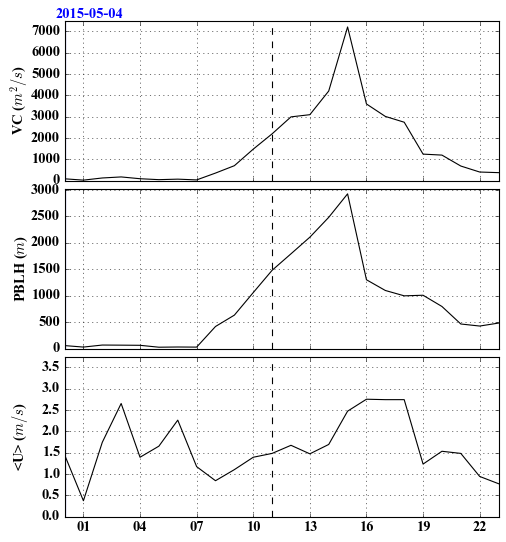

Gráfica:  2015-05-04 01:00:00


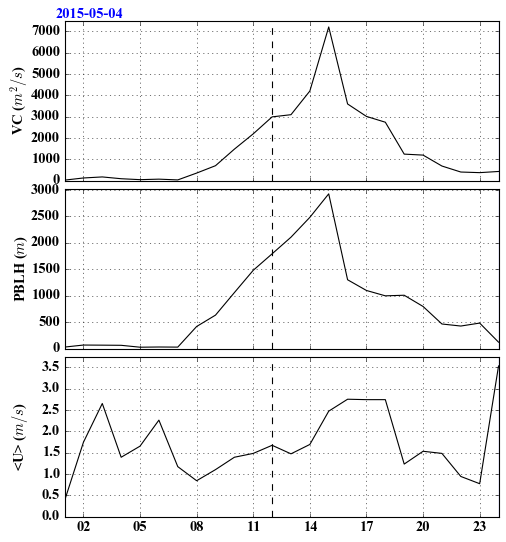

Gráfica:  2015-05-04 02:00:00


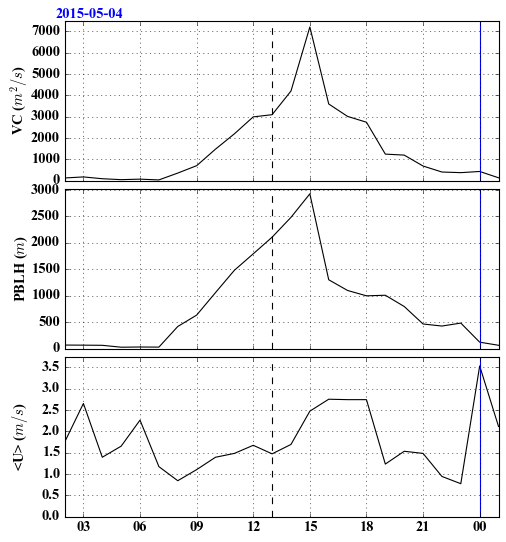

Gráfica:  2015-05-04 03:00:00


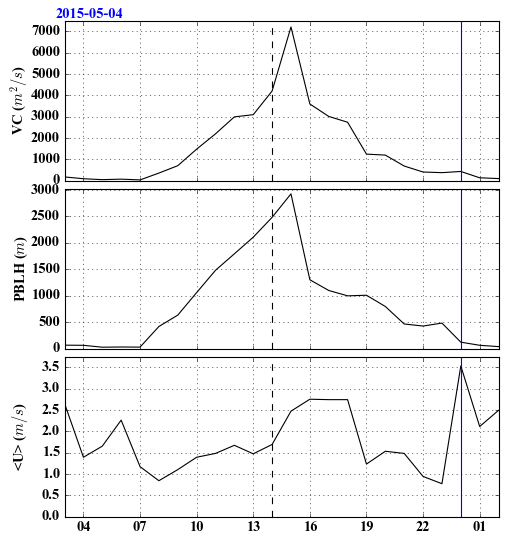

Gráfica:  2015-05-04 04:00:00


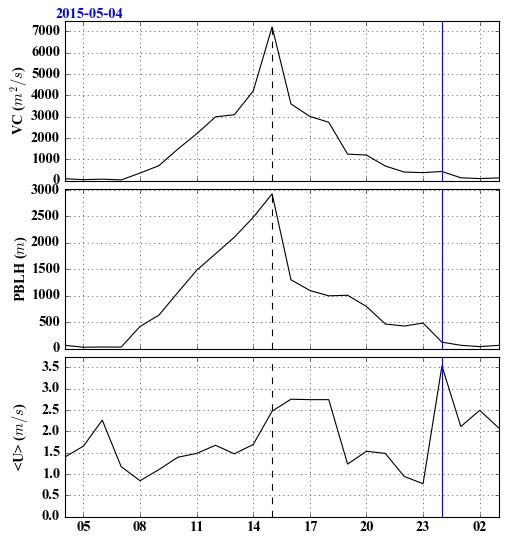

Gráfica:  2015-05-04 05:00:00


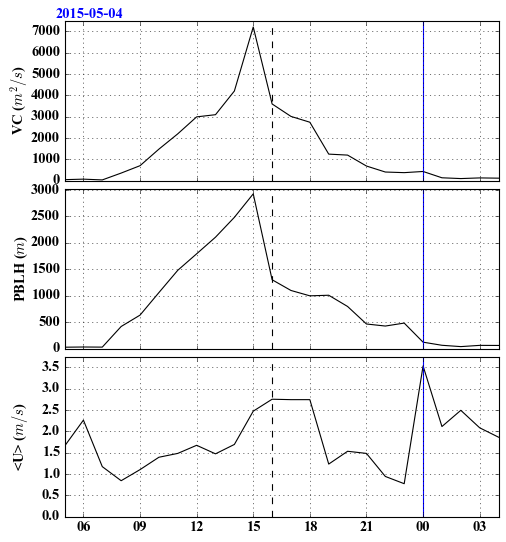

Gráfica:  2015-05-04 06:00:00


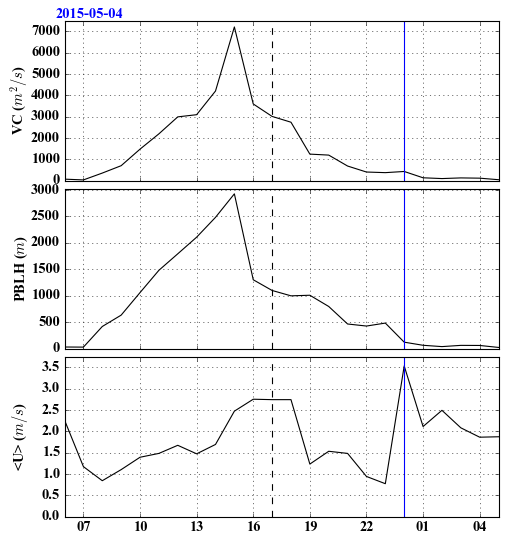

Gráfica:  2015-05-04 07:00:00


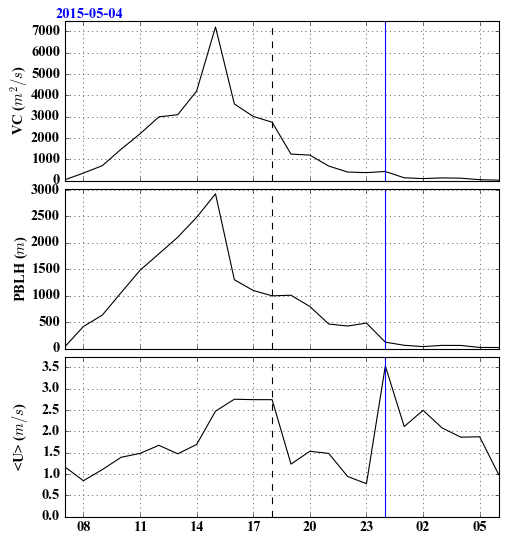

Gráfica:  2015-05-04 08:00:00


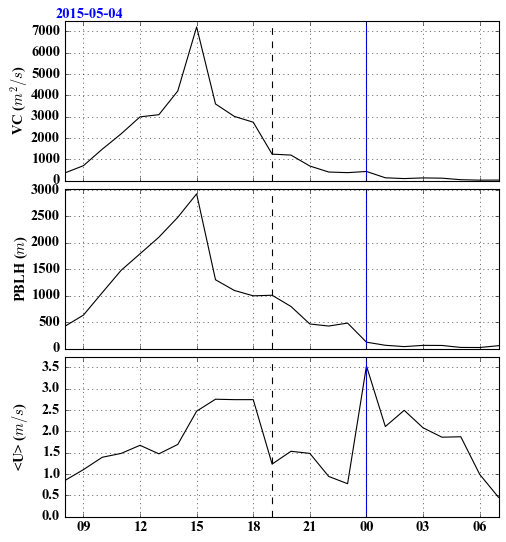

Gráfica:  2015-05-04 09:00:00


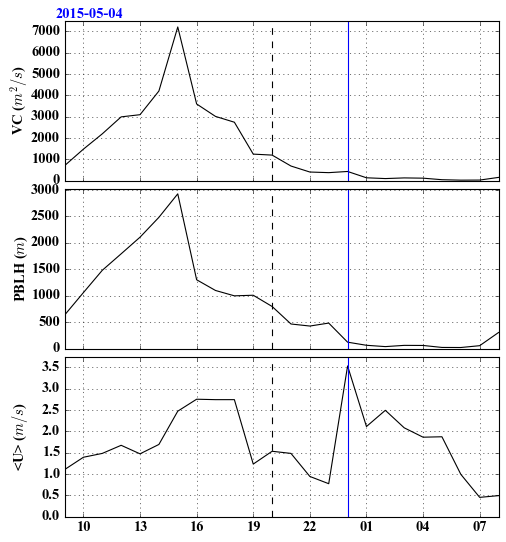

Gráfica:  2015-05-04 10:00:00


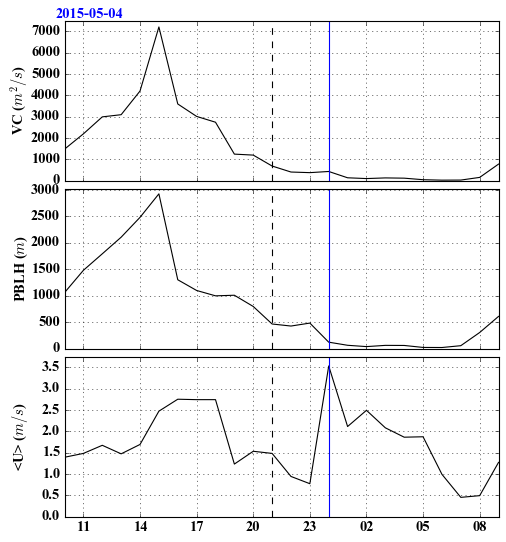

Gráfica:  2015-05-04 11:00:00


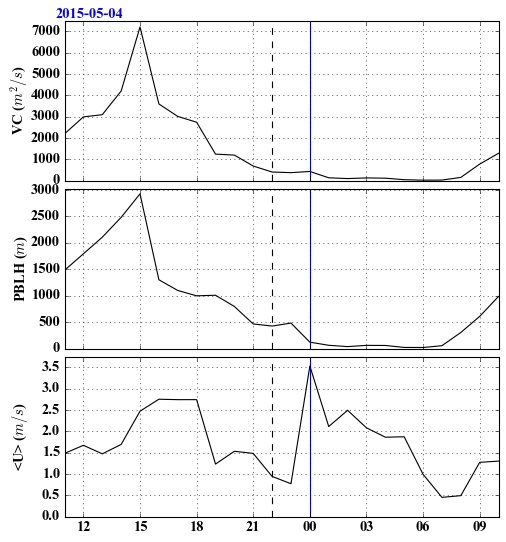

Gráfica:  2015-05-04 12:00:00


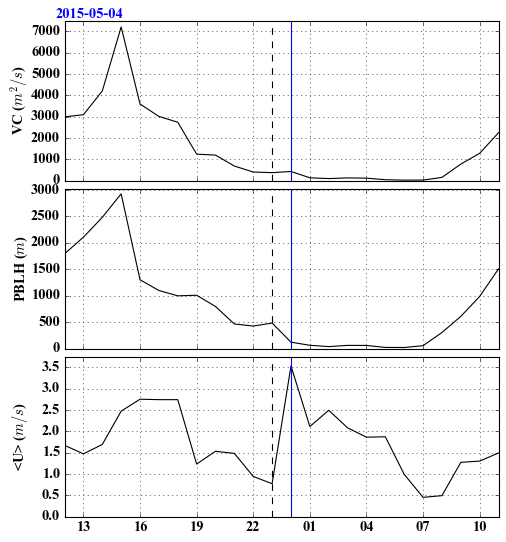

Gráfica:  2015-05-04 13:00:00


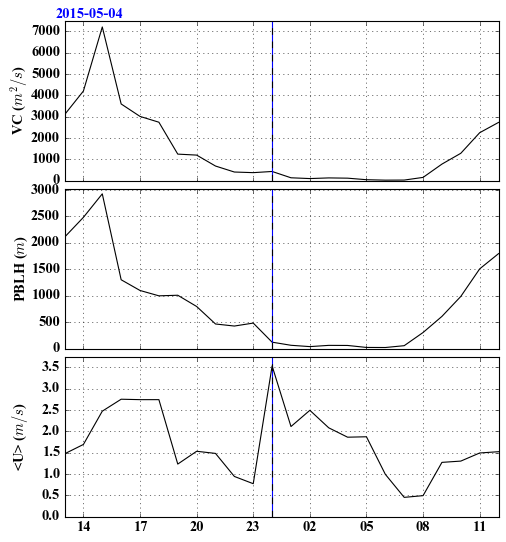

Gráfica:  2015-05-04 14:00:00


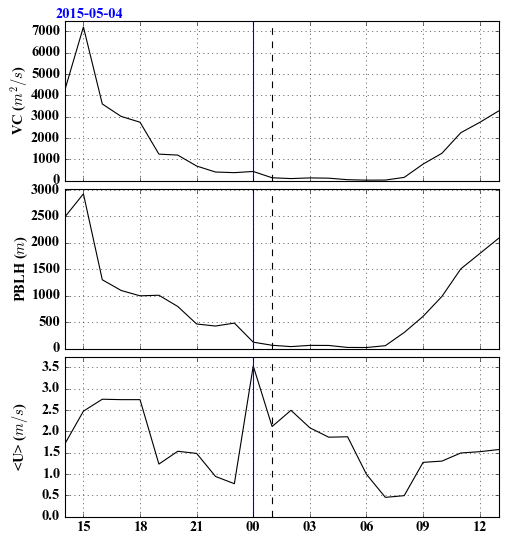

Gráfica:  2015-05-04 15:00:00


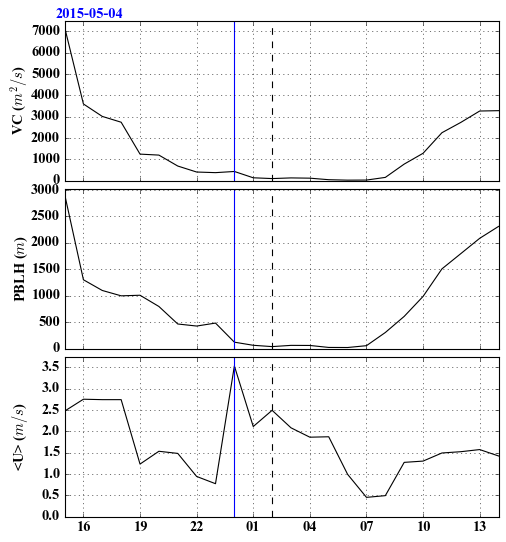

Gráfica:  2015-05-04 16:00:00


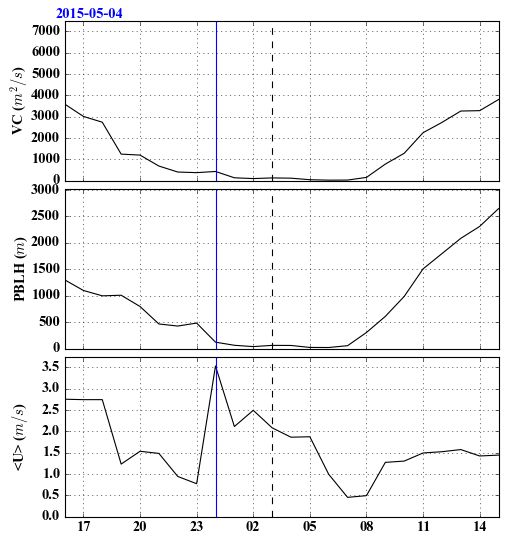

Gráfica:  2015-05-04 17:00:00


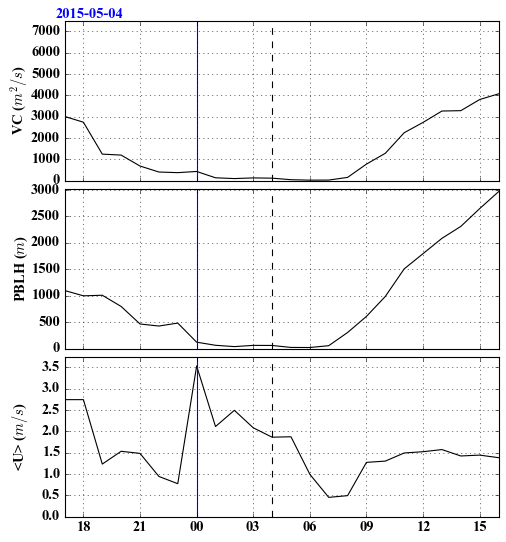

Gráfica:  2015-05-04 18:00:00


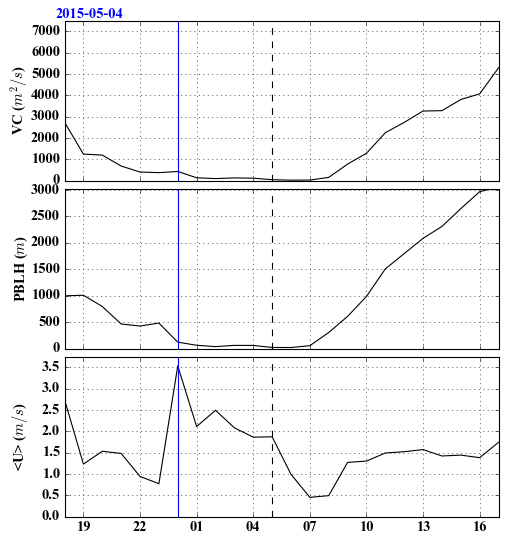

Gráfica:  2015-05-04 19:00:00


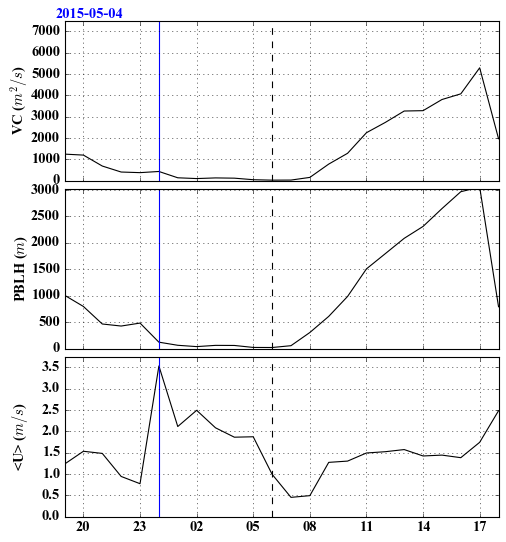

Gráfica:  2015-05-04 20:00:00


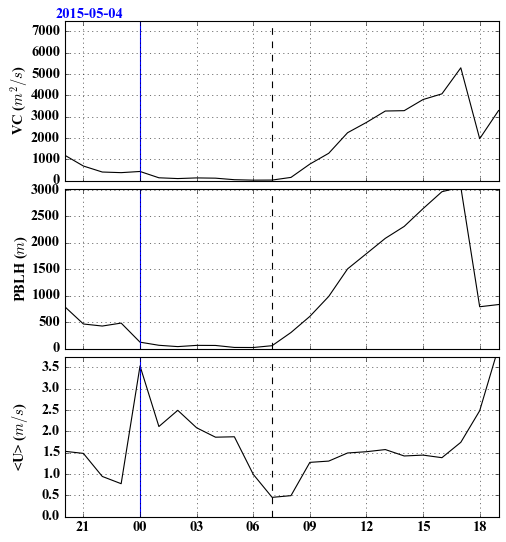

Gráfica:  2015-05-04 21:00:00


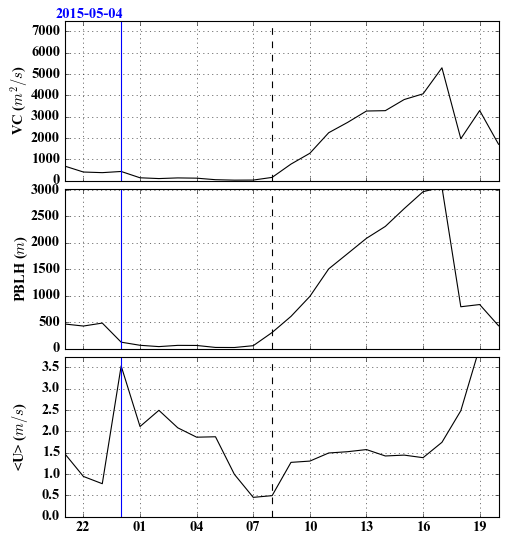

Gráfica:  2015-05-04 22:00:00


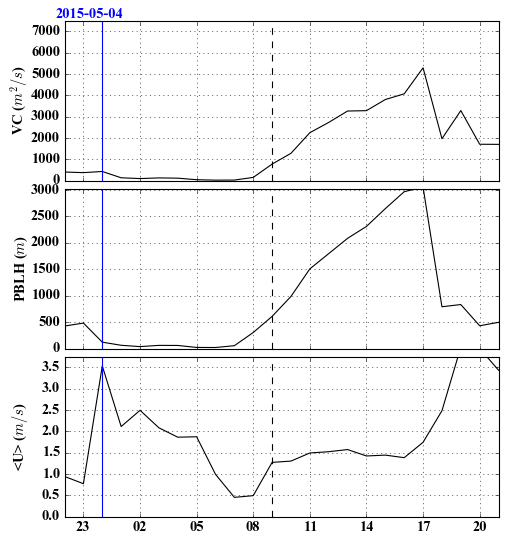

Gráfica:  2015-05-04 23:00:00


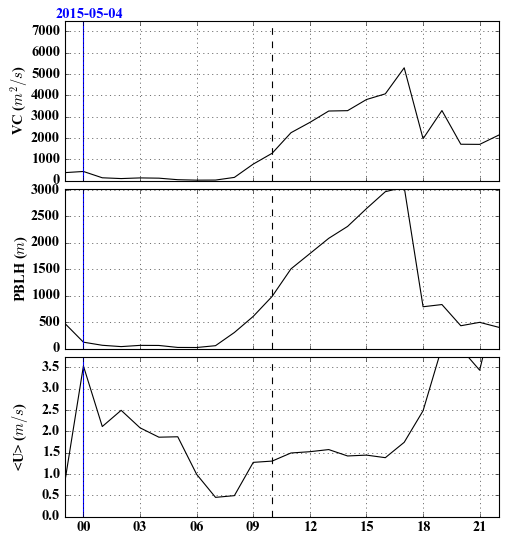

In [45]:
k = 1

month_dat = may_dat

inicio = "2015-05-04 00:00:00"
fin = "2015-05-04 23:00:00"

dias = pd.date_range(inicio, fin, freq='1H')
vc_max = month_dat['VC_24'][inicio:fin].max()
pblh_max = month_dat['pblh_24'][inicio:fin].max()
u_max = month_dat['u_mean_24'][inicio:fin].max()
print('VC_max', vc_max)
print('PBLH_max', pblh_max)
print('U_max', u_max)
for i in dias:
    print('Gráfica: ', i)
    
    f = i+pd.to_timedelta(23, unit='h')
    #print('ff', f.hour)
    
    #print('cero', cero)
    date_i = i
    date_f = f
    cero = date_f - pd.to_timedelta(date_f.hour, unit='h')
    middle = date_f - pd.to_timedelta(12, unit='h')
    
    #plt.clf()
    
    fig = plt.figure(figsize = (7,8))
    gs1 = gridspec.GridSpec(3,1)
    gs1.update(hspace=0.05) # set the spacing between axes. 
    fig.suptitle(date_i.date(), y = 0.92, x = 0.17, color = 'blue')

    #ax1 = host_subplot(gs1[0] ,axes_class=AA.Axes)
    ax1 = plt.subplot(gs1[0])
    ax1.plot(month_dat['VC_24'][date_i:date_f], color = 'k')
    #ax1.scatter(month_dat['VC_24'][date_i:date_f].index.values, month_dat['VC_24'][date_i:date_f].values, marker = 's', color = 'k')
    ax1.axvline(cero, ymin=0, ymax=25000)
    ax1.axvline(middle, ymin=0, ymax=25000, linestyle = 'dashed', color = 'k')
    

    ax1.grid(which='both')
    ax1.tick_params(labelbottom=False)
    ax1.set_ylabel('VC ($m^2/s$)')
    ax1.set_xlim(date_i, date_f)
    ax1.set_ylim(0, vc_max + 300)
    ax1.set_xticklabels([cero])
    ax1.get_yaxis().set_label_coords(-0.08,0.5)

    ax2 = plt.subplot(gs1[1])
    ax2.plot(month_dat['pblh_24'][date_i:date_f], color = 'k')
    ax2.grid(which='both')
    ax2.tick_params(labelbottom=False)
    ax2.set_ylabel('PBLH ($m$)')
    ax2.set_xlim(date_i, date_f)
    ax2.set_ylim(0, pblh_max + 100)
    ax2.get_yaxis().set_label_coords(-0.08,0.5)
    ax2.axvline(cero, ymin=0, ymax=4500)
    ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

    ax3 = plt.subplot(gs1[2])
    ax3.plot(month_dat['u_mean_24'][date_i:date_f], color = 'k')
    ax3.axvline(cero, ymin=0, ymax=11)
    ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
    ax3.grid(which='both')
    ax3.set_ylabel('<U> ($m/s$)')
    ax3.set_xlim(date_i, date_f)
    ax3.set_ylim(0, u_max + 1)
    ax3.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()
    
    #h = '%03d'%k
    #plt.savefig('/Users/claudiopierard/VC/animaciones/VC_series/may_cont_1/may_cont_1'+ h)
    #k += 1
    #plt.close(fig)

In [8]:
k = 1

month_dat = may_dat

inicio = "2015-05-04"
fin = "2015-05-05"

dias = pd.date_range(inicio, fin, freq='1H')
vc_max = month_dat['VC_24'][inicio:fin].max()
pblh_max = month_dat['pblh_24'][inicio:fin].max()
u_max = month_dat['u_mean_24'][inicio:fin].max()
print('VC_max', vc_max)
print('PBLH_max', pblh_max)
print('U_max', u_max)
for i in dias:
    print('Gráfica: ', i)
    
    f = i+pd.to_timedelta(23, unit='h')
    #print('ff', f.hour)
    
    #print('cero', cero)
    date_i = i
    date_f = f
    cero = date_f - pd.to_timedelta(date_f.hour, unit='h')
    middle = date_f - pd.to_timedelta(12, unit='h')
    
    plt.clf()
    
    fig = plt.figure(figsize = (7,8))
    gs1 = gridspec.GridSpec(3,1)
    gs1.update(hspace=0.05) # set the spacing between axes. 
    fig.suptitle(date_i.date(), y = 0.92, x = 0.17, color = 'blue')

    ax1 = plt.subplot(gs1[0])
    ax1.plot(month_dat['VC_24'][date_i:date_f], color = 'k')
    #ax1.scatter(month_dat['VC_24'][date_i:date_f].index.values, month_dat['VC_24'][date_i:date_f].values, marker = 's', color = 'k')
    ax1.axvline(cero, ymin=0, ymax=25000)
    ax1.axvline(middle, ymin=0, ymax=25000, linestyle = 'dashed', color = 'k')
    

    ax1.grid(which='both')
    ax1.tick_params(labelbottom=False)
    ax1.set_ylabel('VC ($m^2/s$)')
    ax1.set_xlim(date_i, date_f)
    ax1.set_ylim(0, vc_max + 300)
    ax1.set_xticklabels([cero])
    ax1.get_yaxis().set_label_coords(-0.08,0.5)

    ax2 = plt.subplot(gs1[1])
    ax2.plot(month_dat['pblh_24'][date_i:date_f], color = 'k')
    ax2.grid(which='both')
    ax2.tick_params(labelbottom=False)
    ax2.set_ylabel('PBLH ($m$)')
    ax2.set_xlim(date_i, date_f)
    ax2.set_ylim(0, pblh_max + 100)
    ax2.get_yaxis().set_label_coords(-0.08,0.5)
    ax2.axvline(cero, ymin=0, ymax=4500)
    ax2.axvline(middle, ymin=0, ymax=4500, linestyle = 'dashed', color = 'k')

    ax3 = plt.subplot(gs1[2])
    ax3.plot(month_dat['u_mean_24'][date_i:date_f], color = 'k')
    ax3.axvline(cero, ymin=0, ymax=11)
    ax3.axvline(middle, ymin=0, ymax=11, linestyle = 'dashed', color = 'k')
    ax3.grid(which='both')
    ax3.set_ylabel('<U> ($m/s$)')
    ax3.set_xlim(date_i, date_f)
    ax3.set_ylim(0, u_max + 1)
    ax3.get_yaxis().set_label_coords(-0.08,0.5)
    myFmt = mdates.DateFormatter('%H')
    plt.gca().xaxis.set_major_formatter(myFmt)

    #plt.show()
    
    h = '%03d'%k
    plt.savefig('/Users/claudiopierard/VC/animaciones/VC_series/may_cont_1/may_cont_1'+ h)
    k += 1
    plt.close(fig)

VC_max 8011
PBLH_max 3201.27
U_max 5.84
Gráfica:  2015-05-04 00:00:00
Gráfica:  2015-05-04 01:00:00
Gráfica:  2015-05-04 02:00:00
Gráfica:  2015-05-04 03:00:00
Gráfica:  2015-05-04 04:00:00
Gráfica:  2015-05-04 05:00:00
Gráfica:  2015-05-04 06:00:00
Gráfica:  2015-05-04 07:00:00
Gráfica:  2015-05-04 08:00:00
Gráfica:  2015-05-04 09:00:00
Gráfica:  2015-05-04 10:00:00
Gráfica:  2015-05-04 11:00:00
Gráfica:  2015-05-04 12:00:00
Gráfica:  2015-05-04 13:00:00
Gráfica:  2015-05-04 14:00:00
Gráfica:  2015-05-04 15:00:00
Gráfica:  2015-05-04 16:00:00
Gráfica:  2015-05-04 17:00:00
Gráfica:  2015-05-04 18:00:00
Gráfica:  2015-05-04 19:00:00
Gráfica:  2015-05-04 20:00:00
Gráfica:  2015-05-04 21:00:00
Gráfica:  2015-05-04 22:00:00
Gráfica:  2015-05-04 23:00:00
Gráfica:  2015-05-05 00:00:00
Gráfica:  2015-05-05 01:00:00
Gráfica:  2015-05-05 02:00:00
Gráfica:  2015-05-05 03:00:00
Gráfica:  2015-05-05 04:00:00
Gráfica:  2015-05-05 05:00:00
Gráfica:  2015-05-05 06:00:00
Gráfica:  2015-05-05 07:00:00


----------


``` python
k = 1

dias = pd.date_range("2015-03-01", "2015-03-10", freq='1H')
vc_max = mar_dat['VC_24']["2015-03-01":"2015-03-02"].max()
print(vc_max)

for i in dias:
    #print('ii', i.date())
    
    f = i+pd.to_timedelta(23, unit='h')
    #print('ff', f.hour)
    
    date_i = i
    date_f = f
    #print("cero", date_i - pd.to_timedelta(date_i.hour, unit='h'))
    cero = date_i - pd.to_timedelta(date_i.hour, unit='h')
    #print("cero",cero)
    #cero.strftime()
    plt.clf()
    date_i = i
    date_f = f
    
    
    plt.figure(figsize = (5,8))
    gs1 = gridspec.GridSpec(3,1)
    gs1.update(hspace=0.15) # set the spacing between axes. 

    date_i = i
    date_f = i+pd.to_timedelta(23, unit='h')

    ax1 = plt.subplot(gs1[0])

    ax1.plot(mar_dat['VC_24'][date_i:date_f], color = 'k')
    ax1.axvline(cero , ymin = 0,  ymax = 9000)

    ax2 = plt.subplot(gs1[1])
    ax2.plot(mar_dat['pblh_24'][date_i:date_f], color = 'k')

    ax3 = plt.subplot(gs1[2])
    ax3.plot(mar_dat['u_mean_24'][date_i:date_f], color = 'k')
    
    h = '%03d'%k
    plt.savefig('/Users/claudiopierard/VC/animaciones/VC_series/marzo/mar'+ h)
    k += 1
    plt.close(fig)
    #plt.show()
```